In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
from citipy import citipy
# Import linregress
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a91a7d6477d21bc16a0428f942552fb4


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oranjemund
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | komyshnya
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | sabang
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | samusu
City not found. Skipping...
Processing Record 8 of Set 1 | ucluelet
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | senanga
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | aginskoye
Processing Record 17 of Set 1 | paamiut
Processing Record 18 of Set 1 | buraydah
Processing Record 19 of Set 1 | meyungs
City not found. Skipping...
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | puerto carre

Processing Record 38 of Set 4 | butaritari
Processing Record 39 of Set 4 | brae
Processing Record 40 of Set 4 | durazno
Processing Record 41 of Set 4 | general jose eduvigis diaz
Processing Record 42 of Set 4 | varhaug
Processing Record 43 of Set 4 | nyurba
Processing Record 44 of Set 4 | shenjiamen
Processing Record 45 of Set 4 | ciras
City not found. Skipping...
Processing Record 46 of Set 4 | san cristobal
Processing Record 47 of Set 4 | carupano
Processing Record 48 of Set 4 | deputatskiy
Processing Record 49 of Set 4 | port blair
Processing Record 50 of Set 4 | marcona
City not found. Skipping...
Processing Record 1 of Set 5 | solsvik
City not found. Skipping...
Processing Record 2 of Set 5 | nantucket
Processing Record 3 of Set 5 | soe
Processing Record 4 of Set 5 | wasilla
Processing Record 5 of Set 5 | karaul
City not found. Skipping...
Processing Record 6 of Set 5 | caravelas
Processing Record 7 of Set 5 | chicama
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of 

Processing Record 28 of Set 8 | kingman
Processing Record 29 of Set 8 | ankang
Processing Record 30 of Set 8 | zeya
Processing Record 31 of Set 8 | shache
Processing Record 32 of Set 8 | teknaf
Processing Record 33 of Set 8 | talawdi
City not found. Skipping...
Processing Record 34 of Set 8 | voyvozh
Processing Record 35 of Set 8 | kimbe
Processing Record 36 of Set 8 | vardo
Processing Record 37 of Set 8 | kinshasa
Processing Record 38 of Set 8 | lhuntshi
City not found. Skipping...
Processing Record 39 of Set 8 | ambovombe
Processing Record 40 of Set 8 | carlagan
Processing Record 41 of Set 8 | shuyskoye
Processing Record 42 of Set 8 | san vicente
Processing Record 43 of Set 8 | yuncheng
Processing Record 44 of Set 8 | hargeysa
Processing Record 45 of Set 8 | suntar
Processing Record 46 of Set 8 | woodburn
Processing Record 47 of Set 8 | saskylakh
Processing Record 48 of Set 8 | pailon
Processing Record 49 of Set 8 | neiafu
Processing Record 50 of Set 8 | zhicheng
Processing Record 1 

Processing Record 18 of Set 12 | bacalar
Processing Record 19 of Set 12 | bay roberts
Processing Record 20 of Set 12 | rawson
Processing Record 21 of Set 12 | nkhata bay
Processing Record 22 of Set 12 | bundaberg
Processing Record 23 of Set 12 | alice springs
Processing Record 24 of Set 12 | kalininsk
Processing Record 25 of Set 12 | artyk
City not found. Skipping...
Processing Record 26 of Set 12 | malanje
Processing Record 27 of Set 12 | vostok
Processing Record 28 of Set 12 | amelia
Processing Record 29 of Set 12 | kuva
City not found. Skipping...
Processing Record 30 of Set 12 | cabra
Processing Record 31 of Set 12 | puerto baquerizo moreno
Processing Record 32 of Set 12 | adoni
Processing Record 33 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 34 of Set 12 | gigmoto
Processing Record 35 of Set 12 | garowe
Processing Record 36 of Set 12 | newport
Processing Record 37 of Set 12 | roald
Processing Record 38 of Set 12 | sao joao evangelista
Processing Record 39 o

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oranjemund,-28.5500,16.4333,63.34,90,3,7.18,NA,2022-02-10 01:42:16
1,Bredasdorp,-34.5322,20.0403,65.52,82,100,4.61,ZA,2022-02-10 01:40:28
2,Komyshnya,50.1859,33.6840,31.93,87,100,9.93,UA,2022-02-10 01:43:55
3,Hithadhoo,-0.6000,73.0833,81.73,74,14,11.86,MV,2022-02-10 01:40:05
4,Sabang,5.8933,95.3214,81.12,75,100,11.16,ID,2022-02-10 01:40:35
5,Faanui,-16.4833,-151.7500,81.27,75,89,12.59,PF,2022-02-10 01:40:52
6,Ucluelet,48.9329,-125.5528,47.08,93,100,3.67,CA,2022-02-10 01:40:47
7,Punta Arenas,-53.1500,-70.9167,46.51,57,40,21.85,CL,2022-02-10 01:40:09
8,Barrow,71.2906,-156.7887,-20.18,69,100,12.66,US,2022-02-10 01:40:42
9,Busselton,-33.6500,115.3333,78.04,41,5,6.89,AU,2022-02-10 01:35:53


In [8]:
city_data_df_reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_df_reorder]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oranjemund,NA,2022-02-10 01:42:16,-28.5500,16.4333,63.34,90,3,7.18
1,Bredasdorp,ZA,2022-02-10 01:40:28,-34.5322,20.0403,65.52,82,100,4.61
2,Komyshnya,UA,2022-02-10 01:43:55,50.1859,33.6840,31.93,87,100,9.93
3,Hithadhoo,MV,2022-02-10 01:40:05,-0.6000,73.0833,81.73,74,14,11.86
4,Sabang,ID,2022-02-10 01:40:35,5.8933,95.3214,81.12,75,100,11.16
...,...,...,...,...,...,...,...,...,...
539,Leningradskiy,RU,2022-02-10 01:40:10,69.3833,178.4167,-28.79,97,83,6.26
540,Teguise,ES,2022-02-10 01:45:45,29.0605,-13.5640,70.02,38,95,3.44
541,Linxia,CN,2022-02-10 01:45:45,35.6003,103.2064,20.79,86,100,1.83
542,Asilah,MA,2022-02-10 01:45:45,35.4650,-6.0348,58.86,84,0,10.69


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

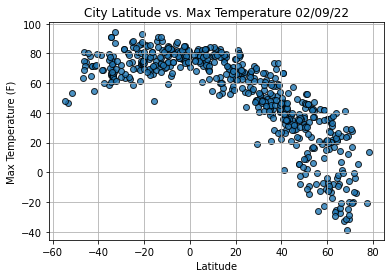

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

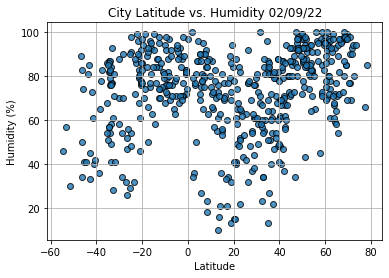

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

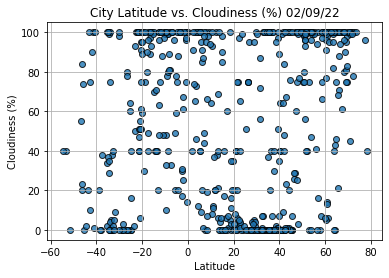

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

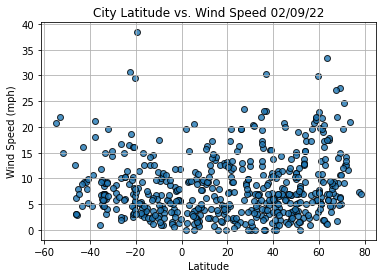

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
index13 =city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2022-02-10 01:40:06
Lat                      -46.1927
Lng                      168.8643
Max Temp                    81.05
Humidity                       34
Cloudiness                     23
Wind Speed                   6.13
Name: 13, dtype: object

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

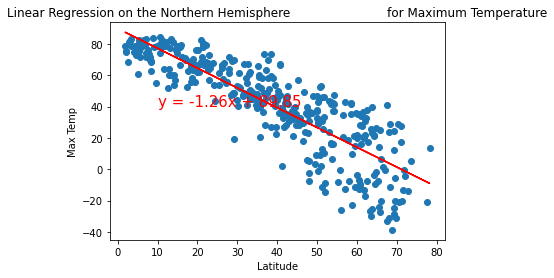

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

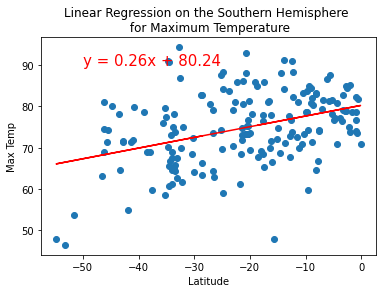

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

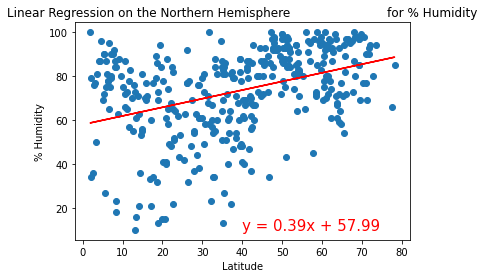

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

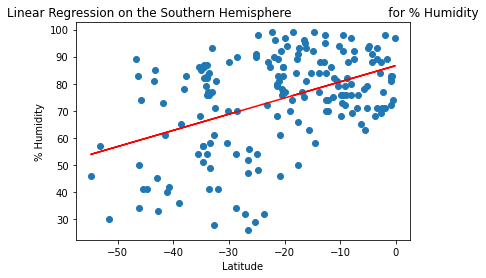

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

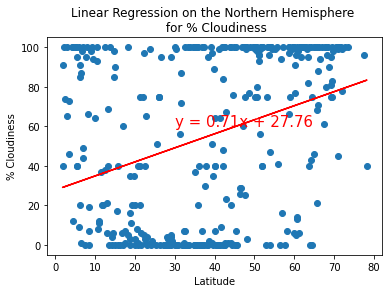

In [22]:
# Linear regression on the Northern Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(30,60))

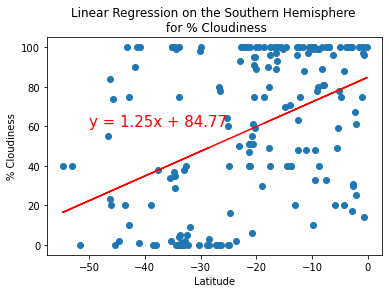

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

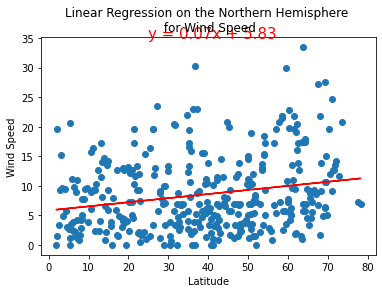

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(25,35))